# 実験Ⅳ－１　重回帰モデル

1. サンプルデータの読み込み
1. 線形重回帰の実行
1. RBF重回帰の実行



In [21]:
!pip install japanize-matplotlib

import warnings
warnings.simplefilter('ignore') #警告を無視（コメントアウト推奨）

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib #日本語化matplotlib
sns.set(font="IPAexGothic") #日本語フォント設定


## Google Colaboratory でファイルを読み込む

以下の方法があります。

1. ファイルをアップロードする
1. URL を指定する

In [22]:
# ファイルをアップロードする
#from google.colab import files
#uploaded_file = files.upload()
#file_name = next(iter(uploaded_file))
#print(file_name)

# URLを指定する
# filename = 'https://...'

In [46]:

#観測データのファイル
filename = './data/practice01_02.csv'

#観測データ（空白区切り）の読み込み
#dataset = pd.read_csv(filename, delim_whitespace=True)
dataset = pd.read_csv(filename)
display(dataset)


,Unnamed: 0,0,25,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800
0,0.00052,0,434,442,466,478,485,490,493,496,502,509,517,525,534,542,550,559,570
1,0.00080,0,403,405,417,432,444,452,458,461,462,464,467,471,471,475,478,482,489
2,0.00100,0,378,381,378,388,411,424,431,435,438,436,438,440,443,445,448,450,453
3,0.00100,0,381,385,383,402,421,431,437,441,444,445,447,448,449,451,453,455,458
4,0.00200,0,328,331,335,338,341,344,347,351,353,356,358,360,361,363,365,367,371
5,0.00300,0,301,307,311,313,316,319,321,324,326,328,329,330,331,333,334,336,340
6,0.00500,0,274,281,286,288,290,292,294,295,297,298,299,300,301,303,304,306,308
7,0.00600,0,269,275,281,282,285,287,289,291,293,294,296,297,298,299,300,302,304
8,0.00900,0,258,262,268,269,271,273,275,276,277,278,279,280,281,282,282,283,285


In [70]:
# 放電電流[mA]
current = dataset.columns[1:].astype(float).to_numpy()
# Arガス圧[Torr]
argasprs = dataset.iloc[:,0].astype(float).to_numpy()

x1,x2 = np.meshgrid(current,argasprs) 

# 目的変数の設定 放電電圧[V]
#y = dataset.iloc[:,1].values.reshape(-1,1)
#display(y)

array([[  0.,  25.,  50., 100., 150., 200., 250., 300., 350., 400., 450.,
        500., 550., 600., 650., 700., 750., 800.],
       [  0.,  25.,  50., 100., 150., 200., 250., 300., 350., 400., 450.,
        500., 550., 600., 650., 700., 750., 800.],
       [  0.,  25.,  50., 100., 150., 200., 250., 300., 350., 400., 450.,
        500., 550., 600., 650., 700., 750., 800.],
       [  0.,  25.,  50., 100., 150., 200., 250., 300., 350., 400., 450.,
        500., 550., 600., 650., 700., 750., 800.],
       [  0.,  25.,  50., 100., 150., 200., 250., 300., 350., 400., 450.,
        500., 550., 600., 650., 700., 750., 800.],
       [  0.,  25.,  50., 100., 150., 200., 250., 300., 350., 400., 450.,
        500., 550., 600., 650., 700., 750., 800.],
       [  0.,  25.,  50., 100., 150., 200., 250., 300., 350., 400., 450.,
        500., 550., 600., 650., 700., 750., 800.],
       [  0.,  25.,  50., 100., 150., 200., 250., 300., 350., 400., 450.,
        500., 550., 600., 650., 700., 750., 800.],


array([[0.00052, 0.00052, 0.00052, 0.00052, 0.00052, 0.00052, 0.00052,
        0.00052, 0.00052, 0.00052, 0.00052, 0.00052, 0.00052, 0.00052,
        0.00052, 0.00052, 0.00052, 0.00052],
       [0.0008 , 0.0008 , 0.0008 , 0.0008 , 0.0008 , 0.0008 , 0.0008 ,
        0.0008 , 0.0008 , 0.0008 , 0.0008 , 0.0008 , 0.0008 , 0.0008 ,
        0.0008 , 0.0008 , 0.0008 , 0.0008 ],
       [0.001  , 0.001  , 0.001  , 0.001  , 0.001  , 0.001  , 0.001  ,
        0.001  , 0.001  , 0.001  , 0.001  , 0.001  , 0.001  , 0.001  ,
        0.001  , 0.001  , 0.001  , 0.001  ],
       [0.001  , 0.001  , 0.001  , 0.001  , 0.001  , 0.001  , 0.001  ,
        0.001  , 0.001  , 0.001  , 0.001  , 0.001  , 0.001  , 0.001  ,
        0.001  , 0.001  , 0.001  , 0.001  ],
       [0.002  , 0.002  , 0.002  , 0.002  , 0.002  , 0.002  , 0.002  ,
        0.002  , 0.002  , 0.002  , 0.002  , 0.002  , 0.002  , 0.002  ,
        0.002  , 0.002  , 0.002  , 0.002  ],
       [0.003  , 0.003  , 0.003  , 0.003  , 0.003  , 0.003  , 0.0

## 観測データの散布図


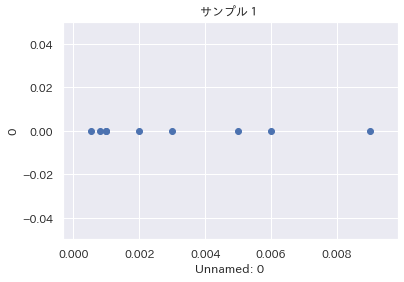

In [25]:
# 散布図の範囲情報の抽出
minx = np.min(x)
maxx = np.max(x)
rx = maxx-minx
cx = 0.5*rx
miny = np.min(y)
maxy = np.max(y)
ry = maxy-miny
cy = 0.5*ry

# 散布図の表示
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_title("サンプル１")
ax.set_xlabel(dataset.columns[0])
ax.set_ylabel(dataset.columns[1])
ax.set_xlim([minx-0.1*rx,maxx+0.1*rx])
ax.set_ylim([miny-0.1*ry,maxy+0.1*ry])
ax.grid(True)
plt.show()

## 線形単回帰の実行

In [26]:
from sklearn.linear_model import LinearRegression

# 線形単回帰のインスタンス生成
regu = LinearRegression()

# 線形単回帰分析
regu.fit(x,y)

LinearRegression()

β0 =  0.00 
β1 =  0.00 


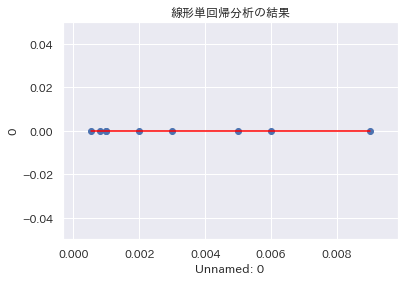

In [27]:
# 推定結果
beta0 = regu.intercept_[0]
beta1 = regu.coef_[0][0]
print("β0 = {0:5.2f} ".format(beta0))
print("β1 = {0:5.2f} ".format(beta1))

# 回帰直線をプロット
fig, ax = plt.subplots()
xfit = np.linspace(minx,maxx,nSamples).reshape(-1,1)
yfit = regu.predict(xfit)
ax.scatter(x,y)
ax.plot(xfit,yfit, color = 'red')
ax.set_title("線形単回帰分析の結果")
ax.set_xlabel(dataset.columns[0])
ax.set_ylabel(dataset.columns[1])
ax.set_xlim([minx-0.1*rx,maxx+0.1*rx])
ax.set_ylim([miny-0.1*ry,maxy+0.1*ry])
ax.grid(True)
plt.show()

## 多項式単回帰モデルの次数の選択


deg = 1: AIC =  -inf 
deg = 2: AIC =  -inf 
deg = 3: AIC =  -inf 
deg = 4: AIC =  -inf 
deg = 5: AIC =  -inf 
deg = 6: AIC =  -inf 
deg = 7: AIC =  -inf 
deg = 8: AIC =  -inf 
deg = 9: AIC =  -inf 
deg = 10: AIC =  -inf 
deg = 11: AIC =  -inf 
deg = 12: AIC =  -inf 
deg = 13: AIC =  -inf 
deg = 14: AIC =  -inf 
deg = 15: AIC =  -inf 
deg = 16: AIC =  -inf 
deg = 17: AIC =  -inf 
deg = 18: AIC =  -inf 
deg = 19: AIC =  -inf 
deg = 20: AIC =  -inf 
deg = 21: AIC =  -inf 
deg = 22: AIC =  -inf 
deg = 23: AIC =  -inf 
deg = 24: AIC =  -inf 
deg = 25: AIC =  -inf 
deg = 26: AIC =  -inf 
deg = 27: AIC =  -inf 
deg = 28: AIC =  -inf 
deg = 29: AIC =  -inf 
deg = 30: AIC =  -inf 


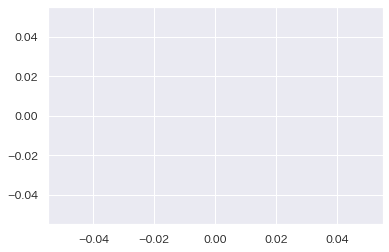

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

maxdeg = 30
deg = np.zeros(maxdeg,dtype=int)
aic = np.zeros(maxdeg)
regp = [ [] for idx in range(maxdeg) ]
for idx in range(maxdeg):
    deg[idx] = idx+1
    # 多項式単回帰のインスタンス生成
    regp[idx] = make_pipeline(PolynomialFeatures(degree=deg[idx]),
                         LinearRegression())
    # 多項式単回帰分析
    regp[idx].fit(x,y)

    # AIC
    ypred = regp[idx].predict(x)
    mse = mean_squared_error(y,ypred)
    aic[idx] = nSamples*np.log(2*np.pi*mse)+nSamples+2*(deg[idx]+2)
    print("deg = {0:d}: AIC = {1:5.2e} ".format(deg[idx],aic[idx]))

# AICのプロット
fig, ax = plt.subplots()
ax.plot(deg,aic)
plt.show()


In [29]:
# 最小のAICを与える次数
degopt = deg[np.argmin(aic)]

# 多項式単回帰のインスタンス生成
regpopt = regp[np.argmin(aic)]

β0 =  0.00 
β1 =  0.00 


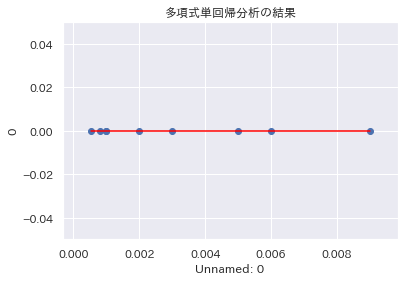

In [30]:
# 推定結果
beta0 = regpopt[1].intercept_[0]
print("β0 = {0:5.2f} ".format(beta0))
for idx in range(1,degopt+1):
    beta = regpopt[1].coef_[0][idx]
    print("β{0:d} = {1:5.2f} ".format(idx,beta))

# 回帰曲線をプロット
fig, ax = plt.subplots()
#xfit = np.linspace(minx,maxx,nSamples).reshape(-1,1)
yfit = regpopt.predict(xfit)
ax.scatter(x,y)
ax.plot(xfit,yfit, color = 'red')
ax.set_title("多項式単回帰分析の結果")
ax.set_xlabel(dataset.columns[0])
ax.set_ylabel(dataset.columns[1])
ax.set_xlim([minx-0.1*rx,maxx+0.1*rx])
ax.set_ylim([miny-0.1*ry,maxy+0.1*ry])
ax.grid(True)
plt.show()